# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [2]:
import pandas as pd

df = pd.read_csv('C:/DS/Springboard/EDA_human_temperature/data/human_body_temperature.csv')

In [23]:
# Your work here.
print(len(df))
print(df.isna().sum())
df.head()

130
temperature    0
gender         0
heart_rate     0
dtype: int64


,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [18]:
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import numpy as np


In [19]:
mu = df['temperature'].mean()
sigma = np.sqrt(df['temperature'].var()) 

print(mu)
print(sigma)

98.24923076923078
0.7331831580389454


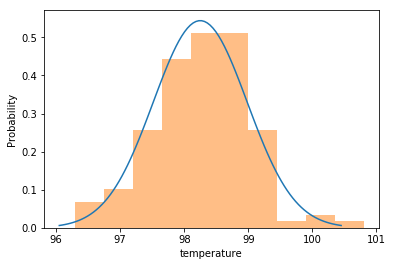

In [20]:
#graphical check of normality
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x,mlab.normpdf(x, mu, sigma))
plt.hist(df['temperature'],bins=10,normed=True,alpha=0.5)
plt.xlabel('temperature')
plt.ylabel('Probability')
plt.show()

In [25]:
#back of envelope test
sigma1 = mu + sigma 
sigma2 = mu + sigma*2
sigma3 = mu + sigma*3
sigma_1 = mu - sigma 
sigma_2 = mu - sigma*2
sigma_3 = mu - sigma*3
obs_sigma1 = len(df[(df['temperature'] >= sigma_1) & (df['temperature'] <= sigma1)])/len(df)
obs_sigma2 = len(df[(df['temperature'] >= sigma_2) & (df['temperature'] <= sigma2)])/len(df)
obs_sigma3 = len(df[(df['temperature'] >= sigma_3) & (df['temperature'] <= sigma3)])/len(df)
print(obs_sigma1)
print(obs_sigma2)
print(obs_sigma3)

# Answer to Q1:
# since the observed probability are close to the 68-95-99.7% target and graphical check of histogram is close to bell shape, 
# this distribution is normal distribution 

0.6923076923076923
0.9461538461538461
0.9923076923076923


In [ ]:
# Answer to Q2:
# sample size is 130
# it should be less than 10% of the total population 
# so it is safe to assume the temperature sample is random and independent 

In [30]:
# bootstrapp hypothesis test
# assume the true mean is 98.6
trans_temp = df['temperature'] - df['temperature'].mean() + 98.6
rep_mean = np.empty(10000)
for i in range(10000):
    bs_temp = np.random.choice(trans_temp,len(df['temperature']))
    rep_mean[i] = bs_temp.mean()
p = np.sum(rep_mean <= df['temperature'].mean())/10000
print(p)
# the low p value suggests the null hypothesis is false, meaning the true mean temperature is not 98.6F

0.0


In [31]:
# I would use one-sample test, since 98.6 is only one value
# I would use t statistic, since we don't have information on the standard deviation of true population
import math 
t = (98.6 - df['temperature'].mean())/(df['temperature'].std()/math.sqrt(len(df)))
# for two-tail 95% confidence level,degree of freedom 129, the t* is 1.98 
# the resulting t is greater than 1.98, meaning the null hypothesis is not true, and true mean is not 98.6

5.454823292364079

In [33]:
# draw 10 sample from the original sample
t_per = np.random.permutation(df['temperature'])
t_10 = t_per[:10]
t_10

array([98. , 98.6, 98.8, 98.2, 99.9, 98. , 98.4, 98.8, 97.1, 98.2])

In [34]:
# bootstrapping of 10 size sample
trans_temp = t_10 - t_10.mean() + 98.6
rep_mean = np.empty(10000)
for i in range(10000):
    bs_temp = np.random.choice(trans_temp,len(t_10))
    rep_mean[i] = bs_temp.mean()
p = np.sum(rep_mean <= t_10.mean())/10000
print(p)

0.1758


In [35]:
# t-test of 10 size sample
t = (98.6 - t_10.mean())/(t_10.std()/math.sqrt(len(t_10)))
t

0.9225312080288304

In [ ]:
# Answer to Q4: conclusions from the 10-sample test are different than the original one
# this is mainly because the small sample size makes the sample not random, 
# therefore none of t-test/z-test/bootstrapping is not suitable to do hypothesis test on this sample

In [38]:
# abnormal temperature range using bootstrapping
rep_low = np.empty(10000)
rep_high = np.empty(10000)
for i in range(10000):
    bs_temp = np.random.choice(df['temperature'],len(df['temperature']))
    rep_low[i] = np.percentile(bs_temp,2.5)
    rep_high[i] = np.percentile(bs_temp,97.5)
# use median of bootstrap low and high value to avoid influence of outliers
temp_low = np.percentile(rep_low,50)
temp_high = np.percentile(rep_high,50)

print("temperature lower than ",temp_low," or higher than ",temp_high, "can be considered abnormal")

temperature lower than  96.7225  or higher than  99.4775 can be considered abnormal


In [39]:
# abnormal temperature range using t-test
# 95% confidence interval
# t-value of two-tail table at degree of freedom is ~ 1.98
t_low = np.percentile(df['temperature'],2.5) - 1.98*(df['temperature'].std()/math.sqrt(len(df)))
t_high = df['temperature'].mean() + 1.98*(df['temperature'].std()/math.sqrt(len(df)))
print("temperature lower than ",t_low," or higher than ",t_high, "can be considered abnormal based on t-test")

temperature lower than  98.12190802389175  or higher than  98.3765535145698 can be considered abnormal based on t-test
